In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import scipy.stats

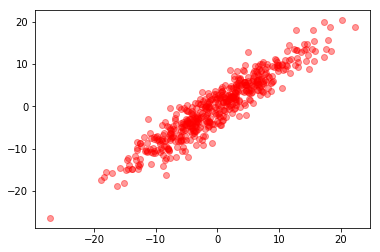

In [2]:
# Example
X1=np.random.randn(500,2) #create array 2D
A=np.array([[6,4],[4,6]])
X2=np.dot(X1,A)
plt.plot(X2[:,0],X2[:,1],'o',alpha=0.4,color='red')
plt.show()

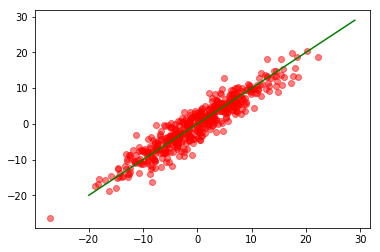

In [3]:
model=[0+1*x for x in np.arange(-20,30)]
plt.plot(X2[:,0],X2[:,1],'o',alpha=0.5,color='red');
plt.plot(np.arange(-20,30),model,'g');
plt.show()

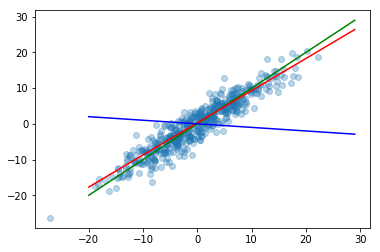

In [4]:
plt.plot(X2[:,0],X2[:,1],'o',alpha=0.3);
model1=[0+1*x for x in np.arange(-20,30)]
model2=[0.3+0.9*x for x in np.arange(-20,30)]
model3=[0-0.1*x for x in np.arange(-20,30)]
plt.plot(np.arange(-20,30),model1,'g')
plt.plot(np.arange(-20,30),model2,'r')
plt.plot(np.arange(-20,30),model3,'b')
plt.show()

In [5]:
ice = pd.read_csv('F:\Learn Python\Data\SeaIce.txt',delim_whitespace=True)
print('Shape: ',ice.shape)
ice[:10]

Shape:  (424, 6)


,year,mo,data_type,region,extent,area
0,1979,1,Goddard,N,15.54,12.33
1,1980,1,Goddard,N,14.96,11.85
2,1981,1,Goddard,N,15.03,11.82
3,1982,1,Goddard,N,15.26,12.11
4,1983,1,Goddard,N,15.10,11.92
5,1984,1,Goddard,N,14.61,11.60
6,1985,1,Goddard,N,14.86,11.60
7,1986,1,Goddard,N,15.02,11.79
8,1987,1,Goddard,N,15.20,11.81
9,1988,1,-9999,N,-9999.00,-9999.00


In [6]:
ice.describe()

,year,mo,extent,area
count,424.000000,424.000000,424.000000,424.000000
mean,1996.000000,6.500000,-35.443066,-37.921108
std,10.214716,3.474323,686.736905,686.566381
min,1978.000000,1.000000,-9999.000000,-9999.000000
25%,1987.000000,3.000000,9.272500,6.347500
50%,1996.000000,6.500000,12.385000,9.895000
75%,2005.000000,10.000000,14.540000,12.222500
max,2014.000000,12.000000,16.450000,13.840000


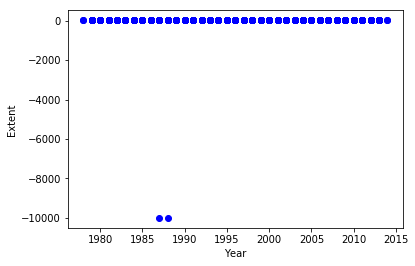

In [7]:
x = ice.year
y = ice.extent
plt.scatter(x,y,color='blue')
plt.xlabel('Year')
plt.ylabel('Extent')
plt.show()

In [8]:
print('Different values in data_type field: ',np.unique(ice.data_type.values))

Different values in data_type field:  ['-9999' 'Goddard' 'NRTSI-G']


In [9]:
print(ice[(ice.data_type!='Goddard')&(ice.data_type!='NRTSI-G')])

     year  mo data_type region  extent    area
9    1988   1     -9999      N -9999.0 -9999.0
397  1987  12     -9999      N -9999.0 -9999.0


Shape:  (422, 6)


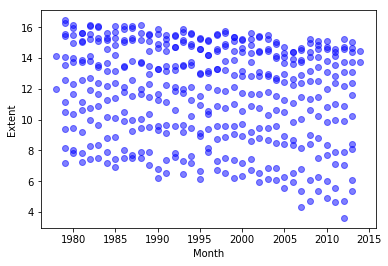

In [10]:
ice_2 = ice[ice.data_type!='-9999']
print('Shape: ',ice_2.shape)
x = ice_2.year
y = ice_2.extent
plt.scatter(x,y,color='blue',alpha=0.5)
plt.xlabel('Month')
plt.ylabel('Extent')
plt.show()

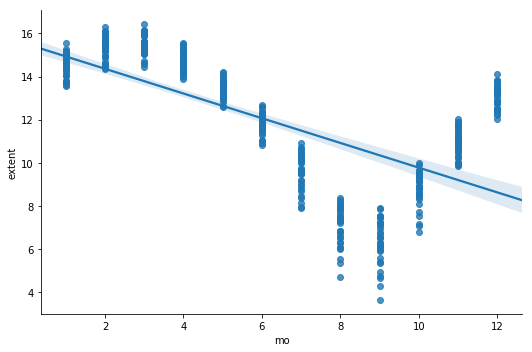

In [11]:
sb.lmplot('mo','extent',ice_2,aspect=1.5,palette='set1')
plt.show()

In [12]:
group = ice_2.groupby('mo')
month_means=group.extent.mean()
month_variances=group.extent.var()
print('Means: ',month_means)
print('Variances: ',month_variances)

Means:  mo
1     14.479429
2     15.298889
3     15.491714
4     14.766000
5     13.396000
6     11.860000
7      9.601143
8      7.122286
9      6.404857
10     8.809143
11    10.964722
12    13.059429
Name: extent, dtype: float64
Variances:  mo
1     0.304906
2     0.295804
3     0.237209
4     0.215378
5     0.189901
6     0.247918
7     0.679175
8     0.824577
9     1.143902
10    0.630361
11    0.412511
12    0.284870
Name: extent, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2862: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


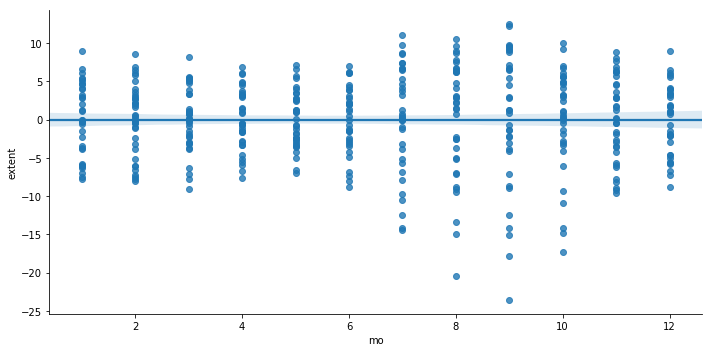

In [13]:
for i in range(12):
    ice_2.extent[ice_2.mo==i+1]=100*(ice_2.extent[ice_2.mo==i+1]- month_means[i+1])/month_means.mean()
sb.lmplot('mo','extent',ice_2,aspect=2,palette='set1')
plt.show()

In [14]:
print('Mean: ',ice_2.extent.mean())
print('Variance: ',ice_2.extent.var())

Mean:  -6.503486532875325e-15
Variance:  31.983239774968794


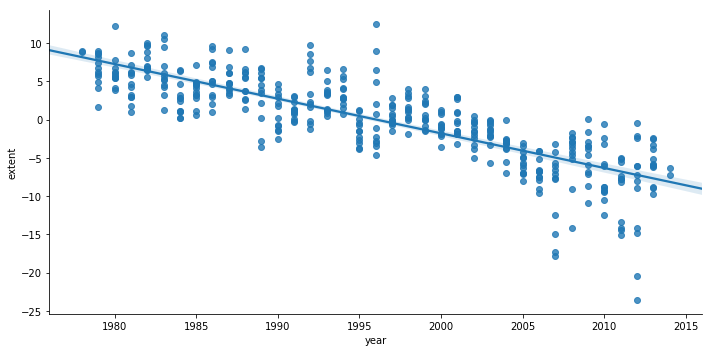

In [15]:
sb.lmplot('year','extent',ice_2,aspect=2)
plt.show()

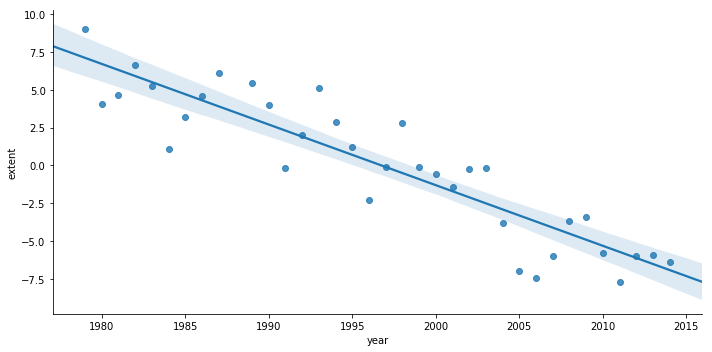

In [16]:
jan=ice_2[ice_2.mo==1];
sb.lmplot('year','extent',jan,aspect=2);
plt.show()

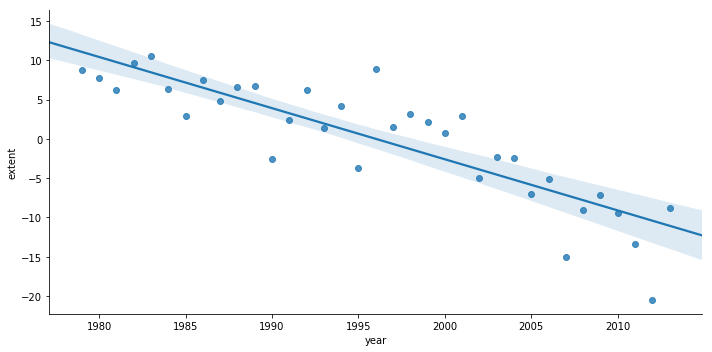

In [17]:
aug=ice_2[ice_2.mo==8]
sb.lmplot('year','extent',aug,aspect=2)
plt.show()

In [18]:
scipy.stats.pearsonr(ice_2.year.values,ice_2.extent.values)

(-0.81835007098971768, 4.4492318168694647e-103)

In [19]:
est=LinearRegression(fit_intercept=True)
x=ice_2[['year']]
y=ice_2[['extent']]
est.fit(x,y)
print('Coefficients: ',est.coef_)
print('Intercepts: ',est.intercept_)

Coefficients:  [[-0.45275459]]
Intercepts:  [ 903.71640207]


In [20]:
x=ice_2[['year']]
y=ice_2[['extent']]
model=LinearRegression()
model.fit(x,y)
y_hat=model.predict(x)
plt.plot(x,y,'o',alpha=0.5)
plt.plot(x,y_hat,'r',alpha=0.5)
plt.xlabel('year')
plt.ylabel('extent (All months)')
print('MSE: ',metrics.mean_squared_error(y_hat,y))
print('R^2: ',metrics.r2_score(y_hat,y))
print('Var: ',y.var())

MSE:  10.5391316398
R^2:  0.50678703821
Var:  extent    31.98324
dtype: float64


In [21]:
x=jan[['year']]
y=jan[['extent']]
model=LinearRegression()
model.fit(x,y)
y_hat=model.predict(x)
plt.figure()
plt.plot(x,y,'-o',alpha=0.7)
plt.plot(x,y_hat,'r',alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Extent (January)')
print('MSE:',metrics.mean_squared_error(y_hat,y))
print('R^2:',metrics.r2_score(y_hat,y))

MSE: 3.83951607529
R^2: 0.78106360414


In [22]:
X=[[2025]]
y_hat=model.predict(X)
j=1
y_hat=(y_hat*month_means.mean()/100)+month_means[j]
print('Prediction of extent for January 2025 (in millions of square km): ',y_hat)

Prediction of extent for January 2025 (in millions of square km):  [[ 13.14449923]]
